# Import Required Libraries

In [1]:
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn

# scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Keras
import keras
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:

# Load the trained model
loaded_model = load_model(r"E:\my graduation project\django_form\notebook\BreastCancer.h5", compile=False)

# Set the path to the directory containing the test images
test_data_path = r"E:\my graduation project\archive (2)\test_images"

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a generator for the test data
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Manually compile the model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)




Found 158 images belonging to 3 classes.


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.9671 - loss: 0.0942


In [3]:
# Convert test accuracy to percentage
test_accuracy_percentage = test_accuracy * 100

# Print consistent accuracy
print(f"Overall Accuracy: {test_accuracy_percentage:.2f}%")


Overall Accuracy: 94.94%


# Display Confusion Matrix



10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 589ms/step


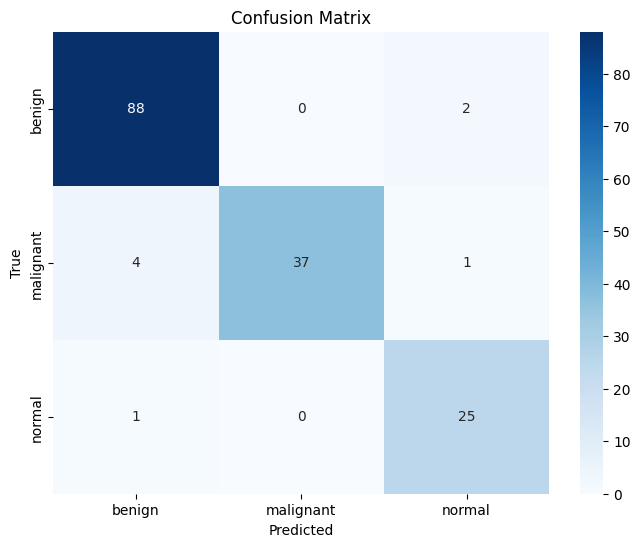

              precision    recall  f1-score   support

      benign       0.95      0.98      0.96        90
   malignant       1.00      0.88      0.94        42
      normal       0.89      0.96      0.93        26

    accuracy                           0.95       158
   macro avg       0.95      0.94      0.94       158
weighted avg       0.95      0.95      0.95       158



In [4]:
# Define class names
class_names = ['benign', 'malignant', 'normal']

# Generate predictions for the test set
predictions = loaded_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(class_report)

In [5]:
# Predictions 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Real Class: malignant
Predicted Class: malignant
"Correct"



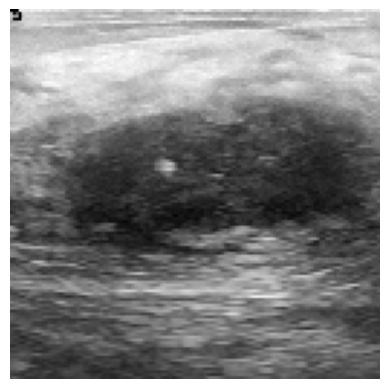

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Real Class: normal
Predicted Class: normal
"Correct"



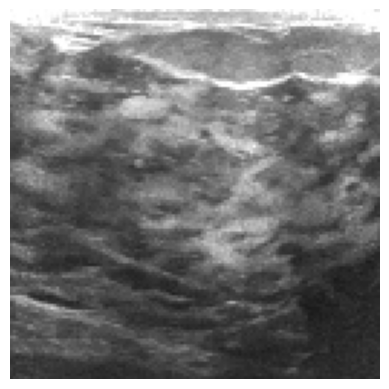

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Real Class: benign
Predicted Class: benign
"Correct"



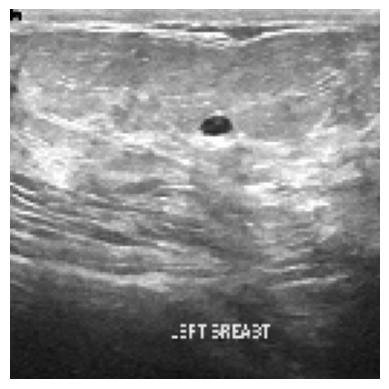

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Real Class: malignant
Predicted Class: malignant
"Correct"



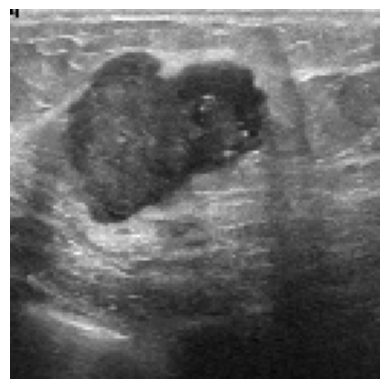

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Real Class: benign
Predicted Class: benign
"Correct"



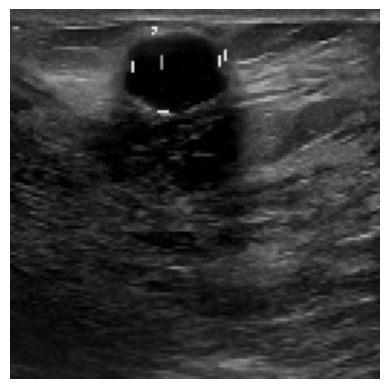

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Real Class: normal
Predicted Class: normal
"Correct"



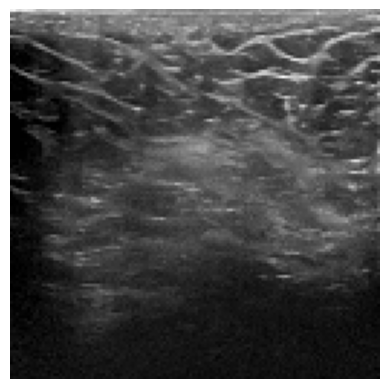


6 out of 6 images are classified correctly.


In [6]:
import os
import numpy as np
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
loaded_model = keras.models.load_model(r"E:\my graduation project\django_form\notebook\BreastCancer.h5")


loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a list of image paths you want to classify
image_paths = [
    r"E:\my graduation project\archive (2)\test_images\malignant\malignant (1).png",
    r"E:\my graduation project\archive (2)\test_images\normal\normal (4).png",
    r"E:\my graduation project\archive (2)\test_images\benign\benign (1).png",
    r"E:\my graduation project\archive (2)\test_images\malignant\malignant (154).png",
    r"E:\my graduation project\archive (2)\test_images\benign\benign (79).png",
    r"E:\my graduation project\archive (2)\test_images\normal\normal (91).png",
]

# Initialize a counter for correct predictions
correct_predictions = 0

# Loop through each image path
for image_path in image_paths:
    #  Fix: Extract the real class correctly (Windows-compatible)
    real_class = os.path.basename(os.path.dirname(image_path))

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index
    predicted_label_index = np.argmax(predictions)

    # Map the predicted class index to the actual class label
    class_labels = {0: 'benign', 1: 'malignant', 2: 'normal'}  
    predicted_label = class_labels.get(predicted_label_index, 'Unknown')

    # Check correctness
    correctness = '"Correct"' if real_class.lower() == predicted_label.lower() else '"Incorrect"'

    # Display results
    print(f'Real Class: {real_class}')
    print(f'Predicted Class: {predicted_label}')
    print(correctness)
    print()

    # Increment correct predictions counter
    if correctness == '"Correct"':
        correct_predictions += 1

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display overall correctness
print(f'\n{correct_predictions} out of {len(image_paths)} images are classified correctly.')


In [7]:
# predictions on begnin

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


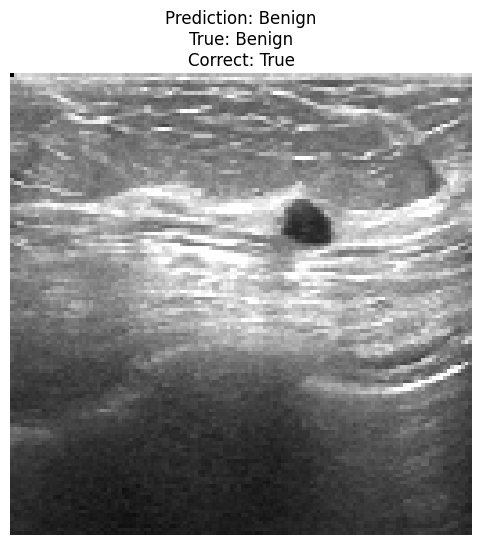

Predicted Label: Benign, True Label: Benign, Correct: True


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def predict_image():
  
    # Define model and image paths
    model_path = r"E:\my graduation project\django_form\notebook\BreastCancer.h5"
    image_path = r"E:\my graduation project\archive (2)\test_images\benign\benign (16).png"
    true_label = "Benign"  

    # Load the trained model
    model = load_model(model_path)

    # Get the input size from the model
    input_shape = model.input_shape[1:3]  # Extract expected (height, width)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=input_shape)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if required

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the highest probability index

    # Extract class labels from the model (if available)
    class_labels = {idx: label for idx, label in enumerate(model.class_names)} if hasattr(model, "class_names") else {
        0: "Benign", 1: "Malignant", 2: "Normal"  # Default labels
    }

    predicted_label = class_labels.get(predicted_class, "Unknown")
    is_correct = predicted_label == true_label

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_label}\nTrue: {true_label}\nCorrect: {is_correct}")
    plt.show()

    return f"Predicted Label: {predicted_label}, True Label: {true_label}, Correct: {is_correct}" 

# Example Usage:
result = predict_image()
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


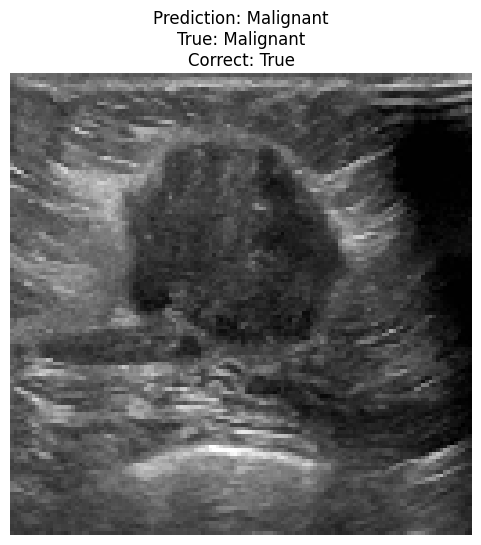

Predicted Label: Malignant, True Label: Malignant, Correct: True


In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def predict_image():
  
    # Define model and image paths
    model_path = r"E:\my graduation project\django_form\notebook\BreastCancer.h5"
    image_path = r"E:\my graduation project\archive (2)\test_images\malignant\malignant (146).png"
    true_label = "Malignant"  # Set the true label manually

    # Load the trained model
    model = load_model(model_path)

    # Get the input size from the model
    input_shape = model.input_shape[1:3]  # Extract expected (height, width)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=input_shape)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if required

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the highest probability index

    # Extract class labels from the model (if available)
    class_labels = {idx: label for idx, label in enumerate(model.class_names)} if hasattr(model, "class_names") else {
        0: "Benign", 1: "Malignant", 2: "Normal"  # Default labels
    }

    predicted_label = class_labels.get(predicted_class, "Unknown")
    is_correct = predicted_label == true_label

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_label}\nTrue: {true_label}\nCorrect: {is_correct}")
    plt.show()

    return f"Predicted Label: {predicted_label}, True Label: {true_label}, Correct: {is_correct}" 

# Example Usage:
result = predict_image()
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


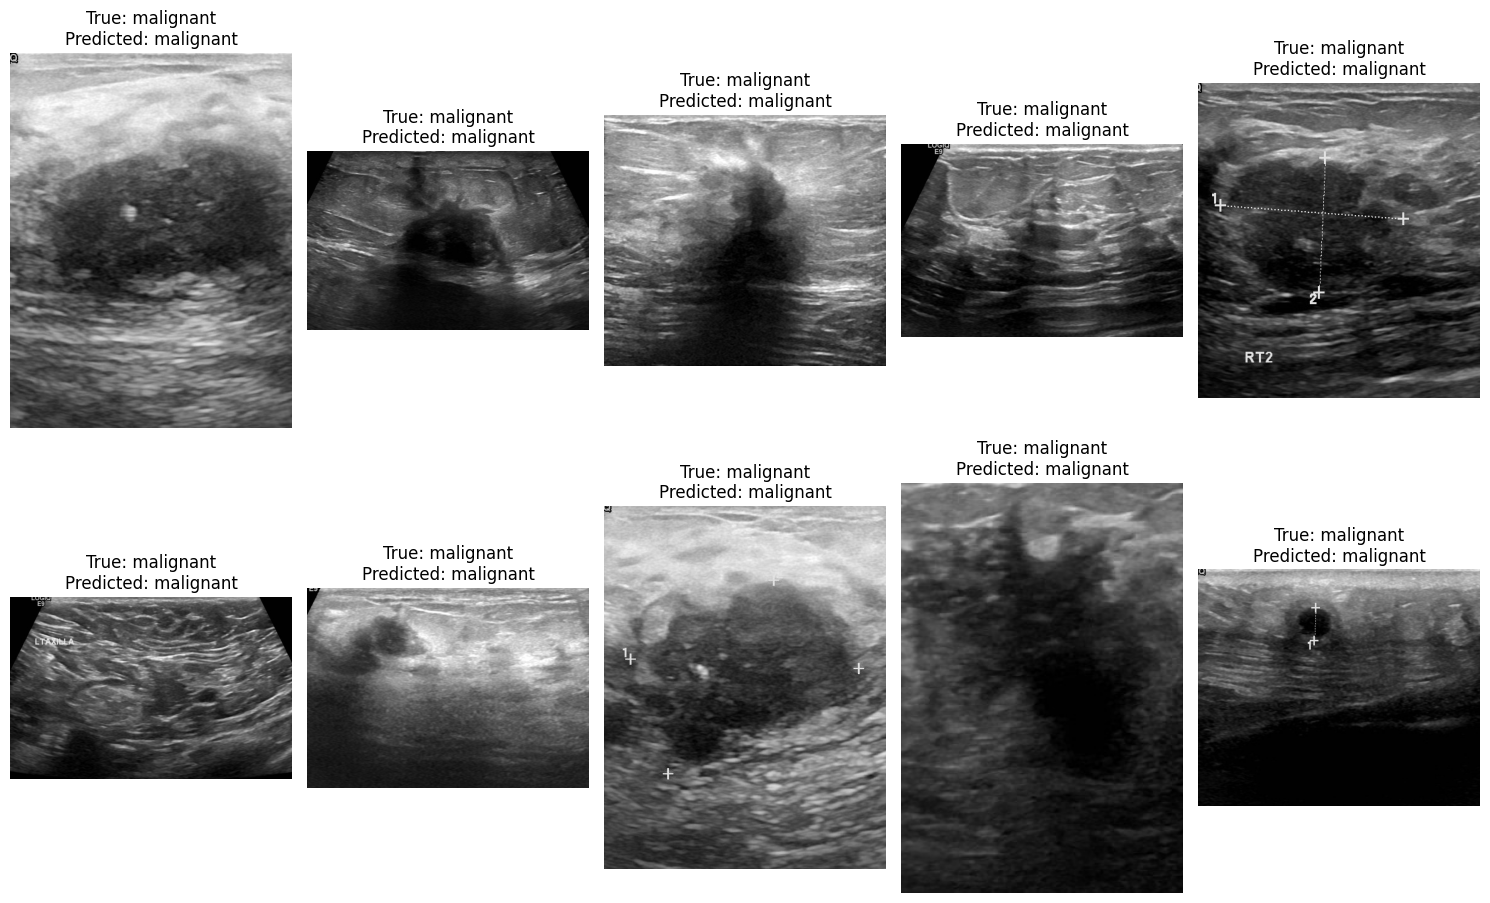

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#  Load the trained model
model_path = r"E:\my graduation project\django_form\notebook\BreastCancer.h5"
model = load_model(model_path) 

# Function to preprocess the image (resize and normalize)
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image
    img = image.img_to_array(img)  # Convert to array
    img = img / 255.0  # Normalize pixel values
    return img

# Function to predict the image class and visualize the result
def predict_image(img_path, label, model, classes):
    img1 = prepare_image(img_path)  # Preprocess image
    res = model.predict(np.expand_dims(img1, axis=0))  # Predict class
    pred = classes[np.argmax(res)]  # Get highest probability prediction

    # Display the image with predicted and true labels
    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}', fontsize=12, color='black')
    plt.axis('off')  # Hide axis for cleaner display

#  Define dataset path and class labels
dataset_path = r"E:\my graduation project\archive (2)\test_images\malignant"  
classes = ['benign', 'malignant', 'normal'] 

#  Get list of images in the folder
image_files = os.listdir(dataset_path)

# Select first 10 images (make sure there are at least 10 images)
image_files = image_files[:10]

# 🔹 Display 10 images in a loop
plt.figure(figsize=(15, 10))  # Set figure size
for i, img_file in enumerate(image_files):
    img_path = os.path.join(dataset_path, img_file)  # Get full image path
    
    plt.subplot(2, 5, i+1)  # Create a 2-row, 5-column grid
    predict_image(img_path, 'malignant', model, classes)  # Predict and display

plt.tight_layout()  # Adjust layout
plt.show()  # Show images


 Model Loaded Successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


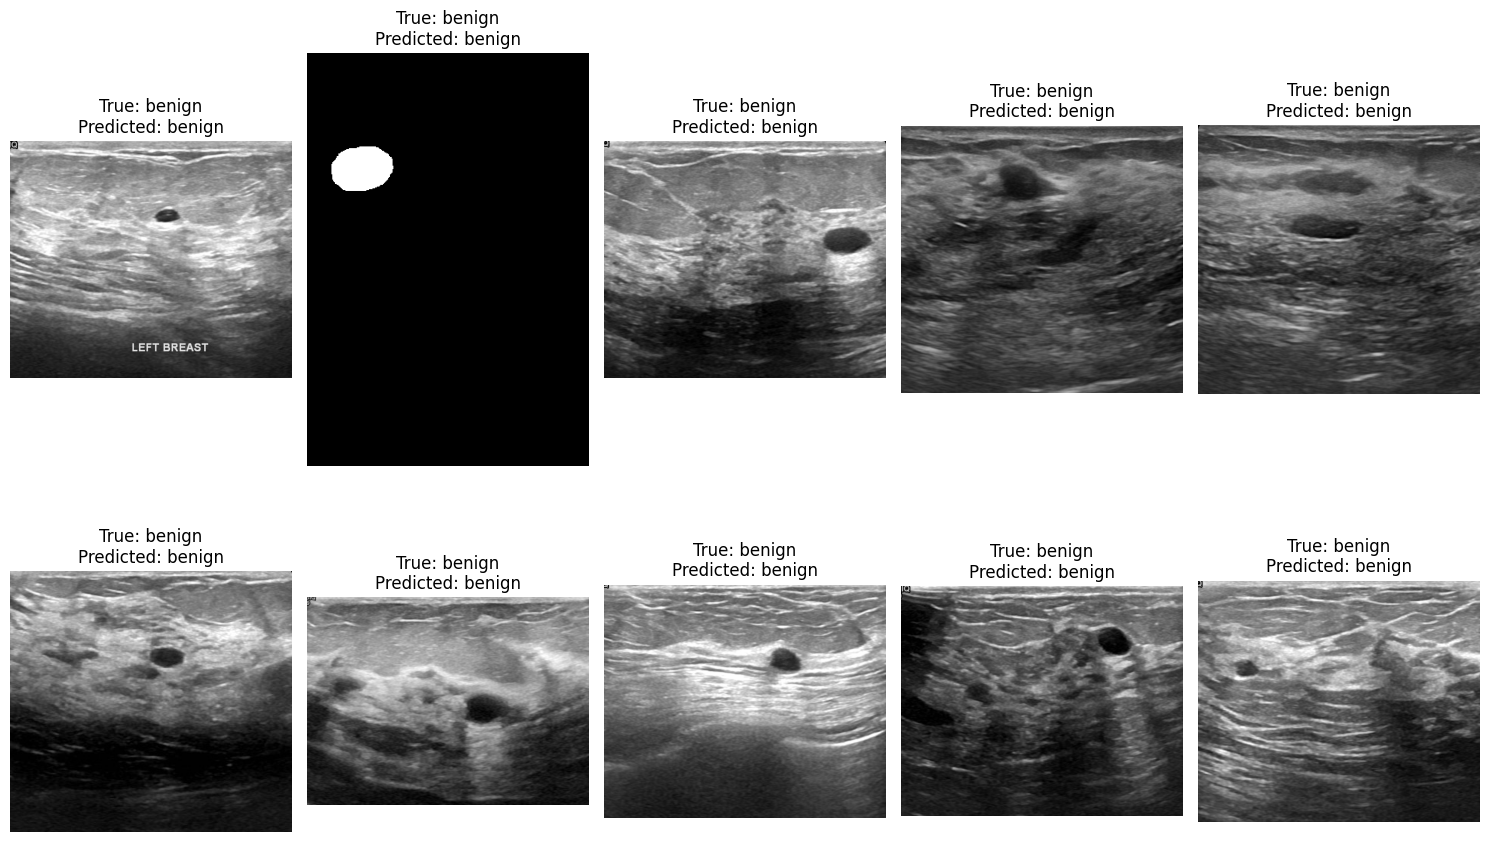

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 🔹 Load the trained model
model_path = r"E:\my graduation project\django_form\notebook\BreastCancer.h5"
model = load_model(model_path)  # Load the trained model
print(" Model Loaded Successfully!")

# Function to preprocess the image (resize and normalize)
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image
    img = image.img_to_array(img)  # Convert to array
    img = img / 255.0  # Normalize pixel values
    return img

# Function to predict the image class and visualize the result
def predict_image(img_path, label, model, classes):
    img1 = prepare_image(img_path)  # Preprocess image
    res = model.predict(np.expand_dims(img1, axis=0))  # Predict class
    pred = classes[np.argmax(res)]  # Get highest probability prediction

    # Display the image with predicted and true labels
    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}', fontsize=12, color='black')
    plt.axis('off')  # Hide axis for cleaner display

# Define dataset path and class labels
dataset_path = r"E:\my graduation project\archive (2)\test_images\benign"  # Change to benign folder
classes = ['benign', 'malignant', 'normal']  

# 🔹 Get list of images in the folder
image_files = os.listdir(dataset_path)

# Select first 10 images (make sure there are at least 10 images)
image_files = image_files[:10]

# 🔹 Display 10 images in a loop
plt.figure(figsize=(15, 10))  # Set figure size
for i, img_file in enumerate(image_files):
    img_path = os.path.join(dataset_path, img_file)  # Get full image path
    
    plt.subplot(2, 5, i+1)  # Create a 2-row, 5-column grid
    predict_image(img_path, 'benign', model, classes)  # Predict and display

plt.tight_layout()  # Adjust layout
plt.show()  # Show images


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


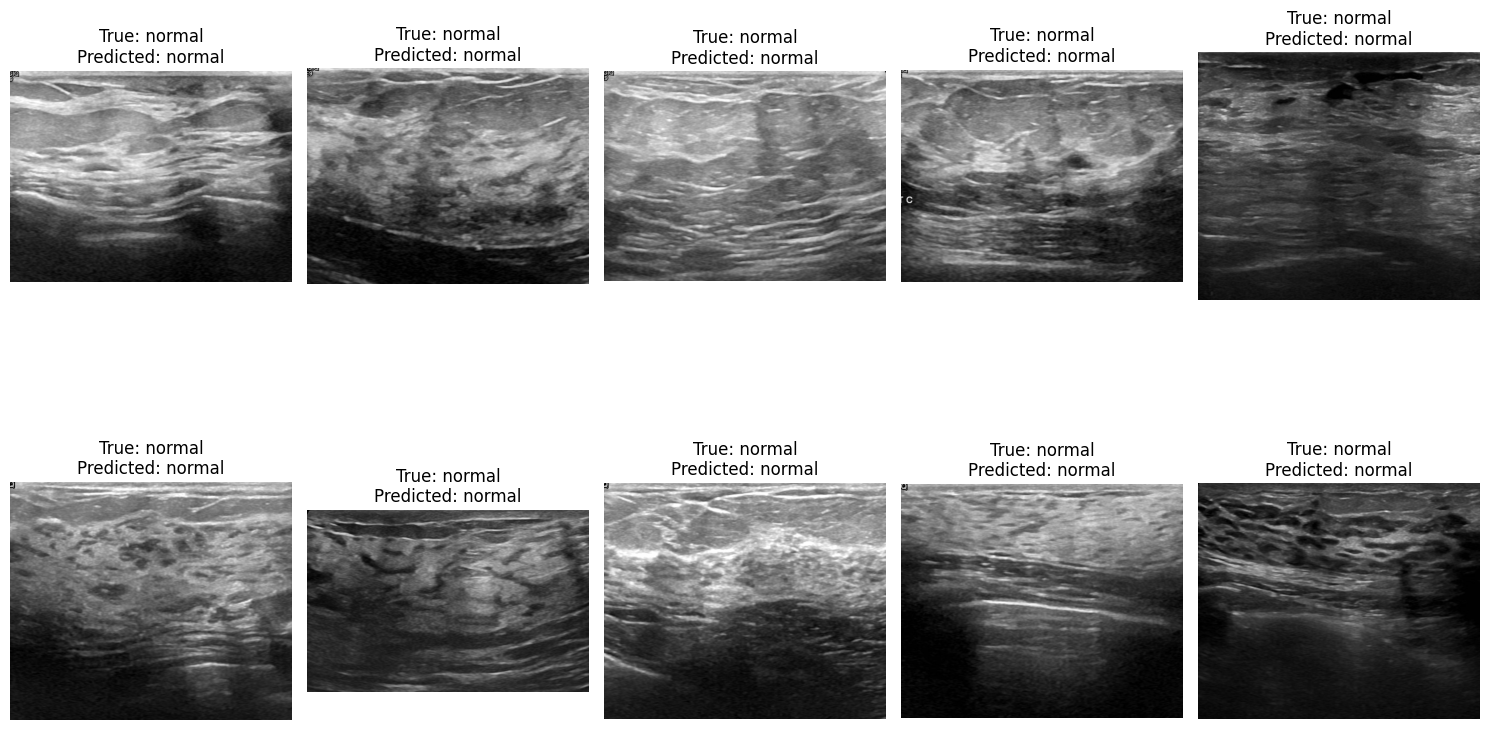

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 🔹 Load the trained model
model_path = r"E:\my graduation project\django_form\notebook\BreastCancer.h5"
model = load_model(model_path) 

# Function to preprocess the image (resize and normalize)
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image
    img = image.img_to_array(img)  # Convert to array
    img = img / 255.0  # Normalize pixel values
    return img

# Function to predict the image class and visualize the result
def predict_image(img_path, label, model, classes):
    img1 = prepare_image(img_path)  # Preprocess image
    res = model.predict(np.expand_dims(img1, axis=0))  # Predict class
    pred = classes[np.argmax(res)]  # Get highest probability prediction

    # Display the image with predicted and true labels
    img = image.load_img(img_path)
    plt.imshow(np.array(img))
    plt.title(f'True: {label}\nPredicted: {pred}', fontsize=12, color='black')
    plt.axis('off')  # Hide axis for cleaner display

# 🔹 Define dataset path and class labels
dataset_path = r"E:\my graduation project\archive (2)\test_images\normal"  # Change to normal folder
classes = ['benign', 'malignant', 'normal']  # Ensure these match your trained model classes

# 🔹 Get list of images in the folder
image_files = os.listdir(dataset_path)

# Select first 10 images (make sure there are at least 10 images)
image_files = image_files[:10]

# 🔹 Display 10 images in a loop
plt.figure(figsize=(15, 10))  # Set figure size
for i, img_file in enumerate(image_files):
    img_path = os.path.join(dataset_path, img_file)  # Get full image path
    
    plt.subplot(2, 5, i+1)  # Create a 2-row, 5-column grid
    predict_image(img_path, 'normal', model, classes)  # Predict and display

plt.tight_layout()  # Adjust layout
plt.show()  # Show images
